In [1]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pylab import rcParams
# Import a scoring metric to compare methods
from sklearn.metrics import r2_score

from   math              import sqrt
from   sklearn.metrics   import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

C:\Users\Monika\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [2]:
# importing data
import os

df = pd.read_csv("Sparkling.csv", parse_dates = True, index_col = 'YearMonth')

In [3]:
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [4]:
df.isnull().sum()

Sparkling    0
dtype: int64

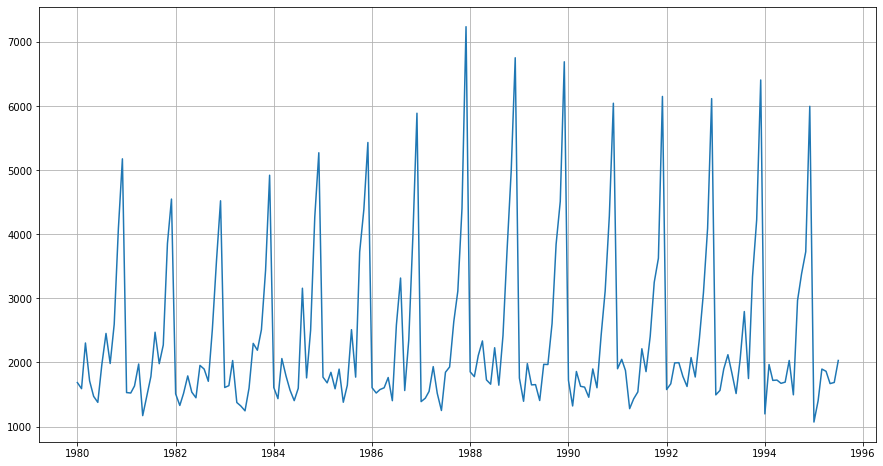

In [5]:
rcParams['figure.figsize'] = 15,8
plt.plot(df)
plt.grid()

We can observe seasonality in the sales.

## Yearly Sales Analysis

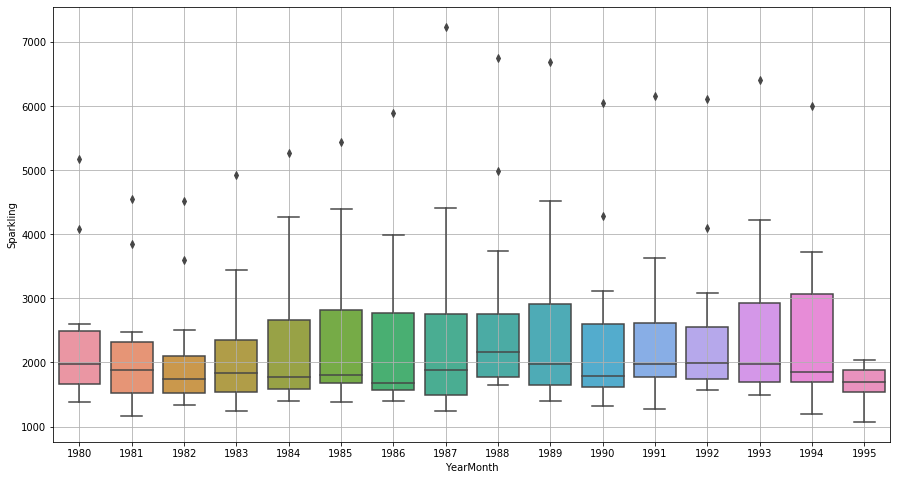

In [6]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

## Monthly Sales Analysis

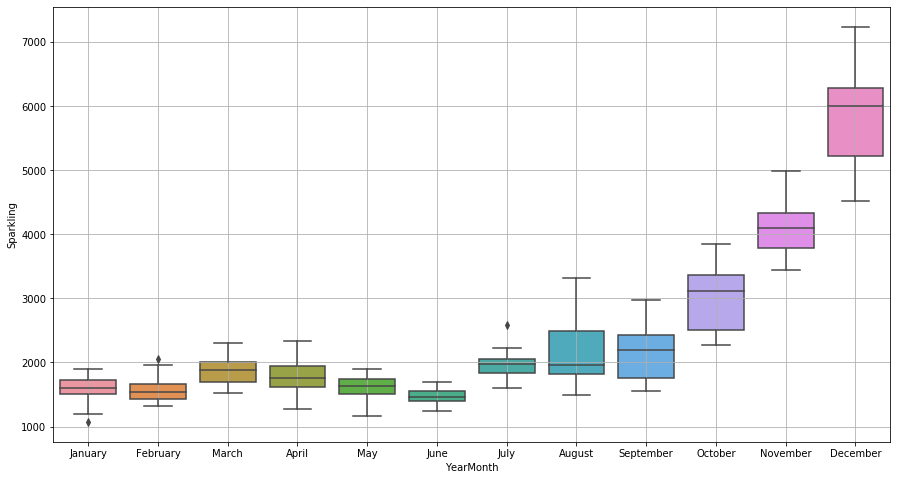

In [7]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

Wine sales are maximum in the month of December and minimum in June

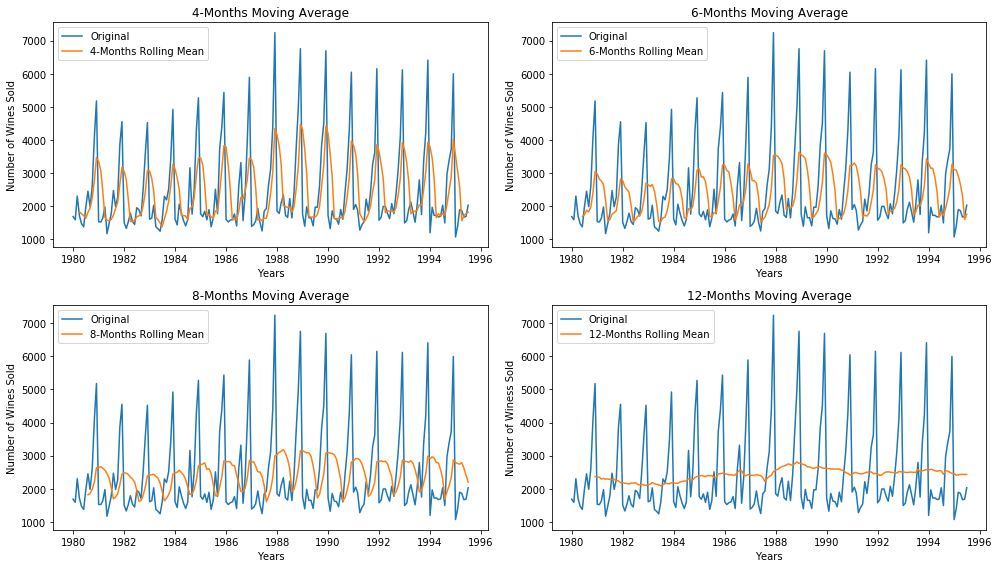

In [9]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(df.index, df, label='Original')
axes[0][0].plot(df.index, df.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Wines Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(df.index, df, label='Original')
axes[0][1].plot(df.index, df.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Wines Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(df.index, df, label='Original')
axes[1][0].plot(df.index, df.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Wines Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(df.index, df, label='Original')
axes[1][1].plot(df.index, df.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Winess Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

## Decomposing Data

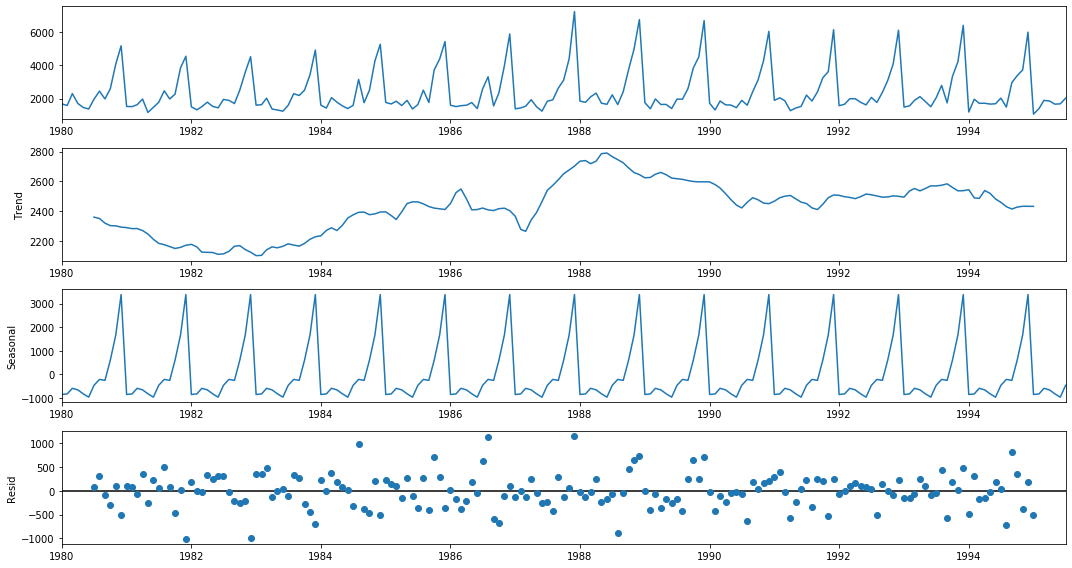

In [10]:
#Additive

decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

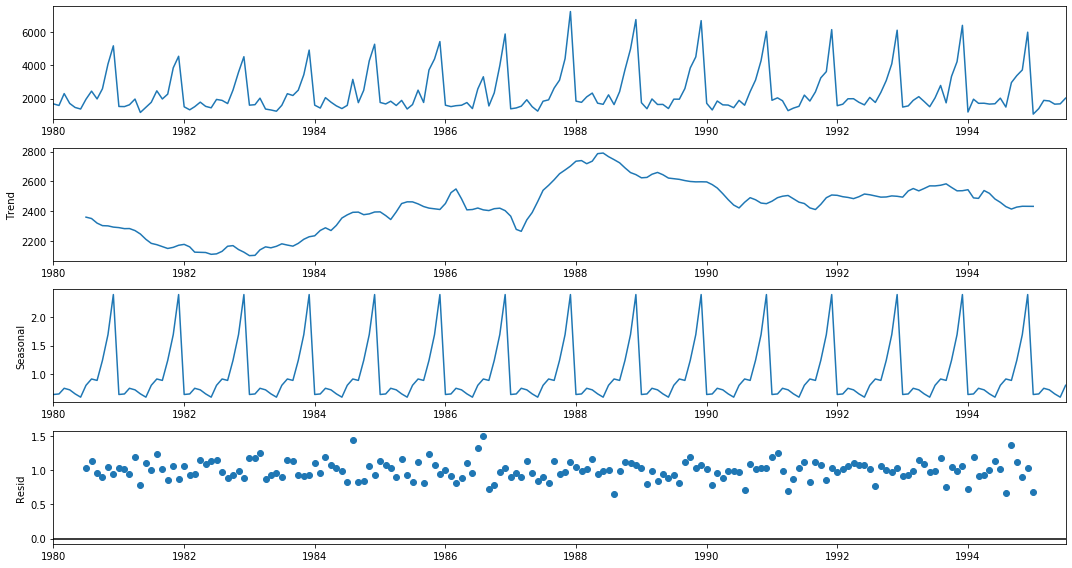

In [11]:
#Multiplicative

decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

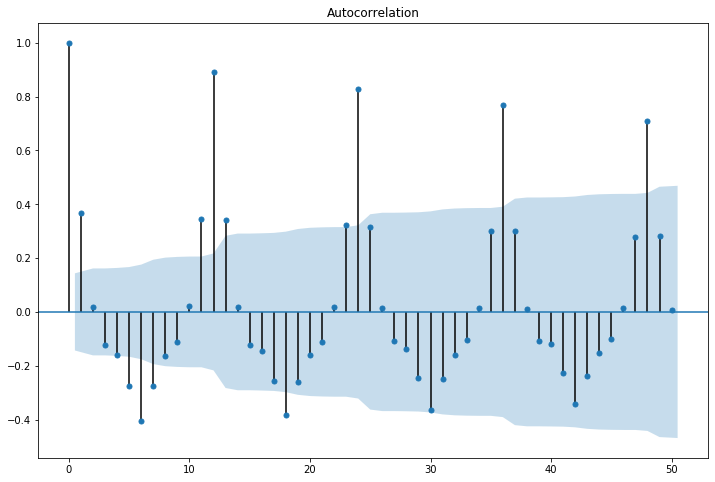

In [12]:
plt.figure(figsize=(12,8))
plot_acf(df,lags=50,  ax=plt.gca())
plt.show()

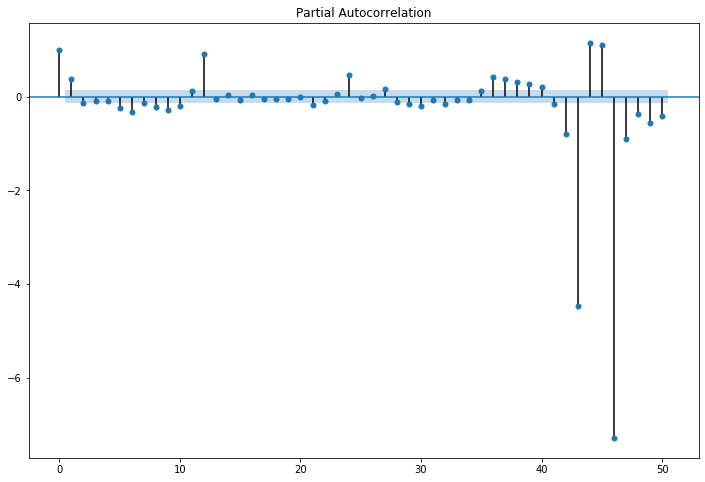

In [13]:
plt.figure(figsize=(12,8))
plot_pacf(df, lags=50, ax=plt.gca())
plt.show()

In [14]:
train=df[df.index.year <1991]
test=df[df.index.year >=1991]

In [15]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [16]:
train.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [17]:
test.head()

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


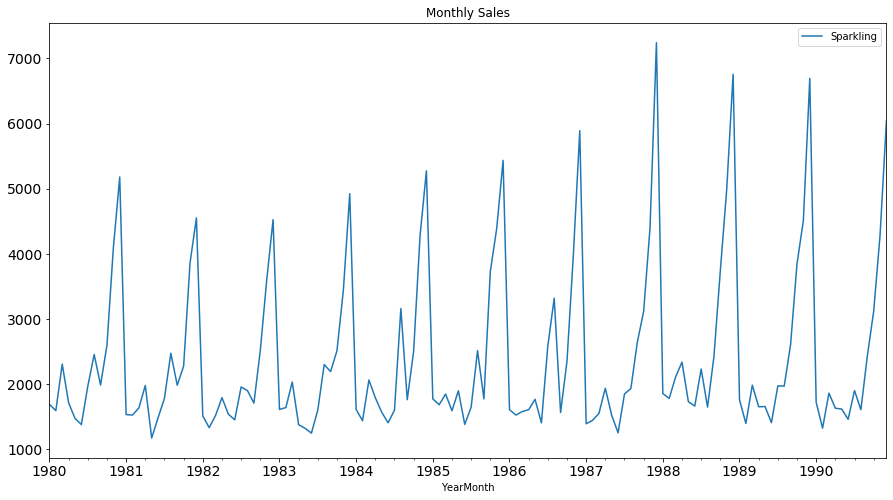

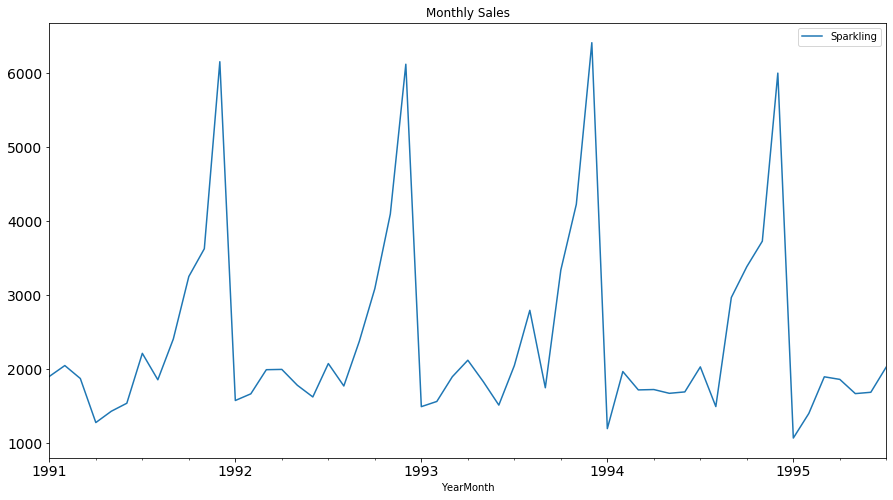

In [18]:
### Plot data

train.plot(figsize=(15,8), title= 'Monthly Sales', fontsize=14)
test.plot(figsize=(15,8), title= 'Monthly Sales', fontsize=14)

## Method 1 - Regression On Time

In [19]:
df1=df.copy()

In [20]:
time = [i+1 for i in range(len(df1))]
df1['time'] = time

In [21]:
df1.head(2)

,Sparkling,time
YearMonth,,
1980-01-01,1686,1
1980-02-01,1591,2


In [22]:
train=df1[df1.index.year <1991]
test=df1[df1.index.year >=1991]

In [23]:
x_train = train.drop('Sparkling',axis=1)
x_test  = test.drop('Sparkling', axis=1)
y_train = train[['Sparkling']]
y_test  = test[['Sparkling']]

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

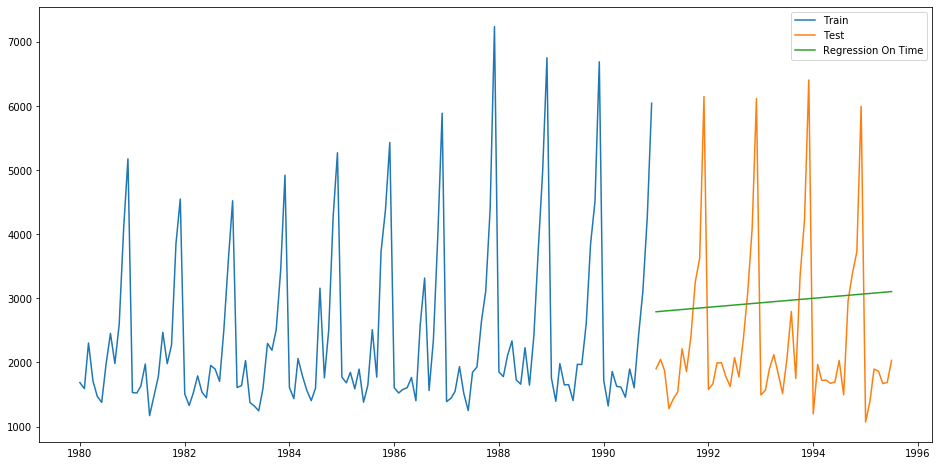

In [27]:
predictions         = lr.predict(x_test)
y_test['RegOnTime'] = predictions

plt.figure(figsize=(16,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

In [28]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [30]:
rmse = sqrt(mean_squared_error(test.Sparkling, y_test.RegOnTime))
rmse = round(rmse, 3)
mape = MAPE(test.Sparkling, y_test.RegOnTime)
print("For RegressionOnTime,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For RegressionOnTime,  RMSE is 1389.135 MAPE is 50.15


In [31]:
resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf

,Method,rmse,mape
0,RegressionOnTime,1389.135,50.15


## Method 2: Regression on Time With Seasonal Components

In [32]:
time = [i+1 for i in range(len(df))]
df1 = df.copy()
df1['time'] = time
print(df1.head())
print(df1.shape[0])
monthSeasonality = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']#defining the 12 
#months

            Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5
187


In [33]:
df1['monthSeasonality'] = (monthSeasonality * 15) + monthSeasonality[0:7] # it is multiplied by 3 as there are 36 observations
df1.head()

,Sparkling,time,monthSeasonality
YearMonth,,,
1980-01-01,1686,1,m1
1980-02-01,1591,2,m2
1980-03-01,2304,3,m3
1980-04-01,1712,4,m4
1980-05-01,1471,5,m5


In [35]:
dfComplete = pd.get_dummies(df1)
dfComplete.tail(5).T

YearMonth,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01
Sparkling,1897,1862,1670,1688,2031
time,183,184,185,186,187
monthSeasonality_m1,0,0,0,0,0
monthSeasonality_m10,0,0,0,0,0
monthSeasonality_m11,0,0,0,0,0
monthSeasonality_m12,0,0,0,0,0
monthSeasonality_m2,0,0,0,0,0
monthSeasonality_m3,1,0,0,0,0
monthSeasonality_m4,0,1,0,0,0
monthSeasonality_m5,0,0,1,0,0


In [36]:
train=dfComplete[dfComplete.index.year <1991]
test=dfComplete[dfComplete.index.year >=1991]

In [37]:
x_train  = train.drop('Sparkling', axis=1)
x_test   = test.drop('Sparkling', axis=1)
y_train  = train[['Sparkling']]
y_test   = test[['Sparkling']]

In [38]:
lrt    = LinearRegression()
lrt.fit(x_train, y_train)
predictions = lrt.predict(x_test)
y_test['RegOnTimeSeasonal'] = predictions

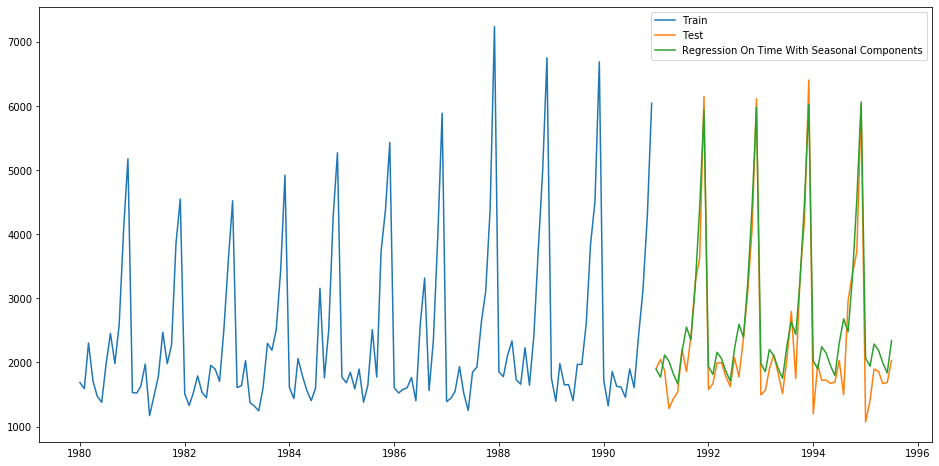

In [39]:
plt.figure(figsize=(16,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_test['RegOnTimeSeasonal'], label='Regression On Time With Seasonal Components')
plt.legend(loc='best')

In [41]:
rmse = sqrt(mean_squared_error(test.Sparkling, y_test.RegOnTimeSeasonal))
rmse = round(rmse, 3)
mape = MAPE(test.Sparkling, y_test.RegOnTimeSeasonal)
print("For RegOnTimeSeasonal,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For RegOnTimeSeasonal,  RMSE is 420.867 MAPE is 13.29


In [42]:
tempResultsDf = pd.DataFrame({'Method':['RegressionOnTimeSeasonal'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,RegressionOnTime,1389.135,50.15
0,RegressionOnTimeSeasonal,420.867,13.29


## Method 3: Naive Approach: $\hat{y}_{t+1} = y_t$

In [43]:
dd= np.asarray(train.Sparkling)

In [44]:
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]

Text(0.5, 1.0, 'Naive Forecast')

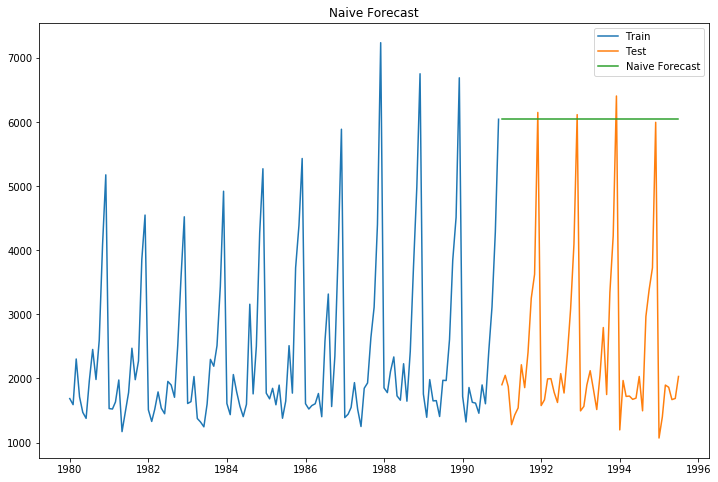

In [45]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Sparkling'], label='Train')
plt.plot(test.index,test['Sparkling'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [46]:
rmse = sqrt(mean_squared_error(test.Sparkling, y_hat.naive))
rmse = round(rmse, 3)
mape = MAPE(test.Sparkling, y_hat.naive)
print("For Naive model,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For Naive model,  RMSE is 3864.279 MAPE is 152.87


In [47]:
tempResultsDf = pd.DataFrame({'Method':['Naive model'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,RegressionOnTime,1389.135,50.15
0,RegressionOnTimeSeasonal,420.867,13.29
0,Naive model,3864.279,152.87


## Method 4: Simple Average

In [48]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sparkling'].mean()

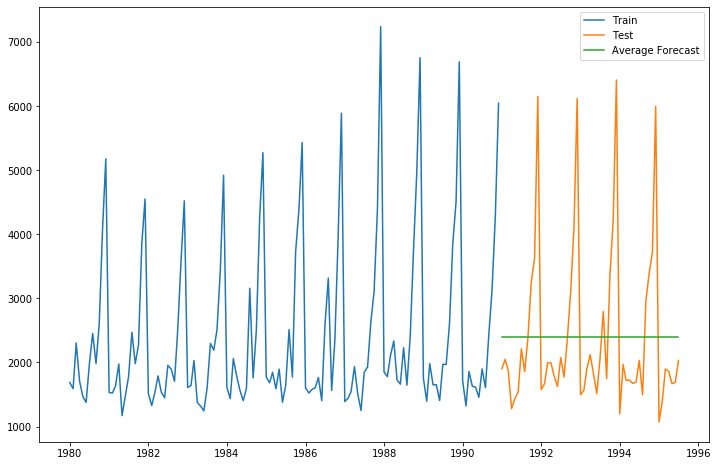

In [49]:
plt.figure(figsize=(12,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [50]:
rmse = sqrt(mean_squared_error(test.Sparkling, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)
mape = MAPE(test.Sparkling, y_hat_avg.avg_forecast)
print("For Simple Average model,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For Simple Average model,  RMSE is 1275.082 MAPE is 38.90


In [51]:
tempResultsDf = pd.DataFrame({'Method':['Simple Average'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,RegressionOnTime,1389.135,50.15
0,RegressionOnTimeSeasonal,420.867,13.29
0,Naive model,3864.279,152.87
0,Simple Average,1275.082,38.90


## Method 5: Moving Average(MA)

In [55]:
df1 = df.copy()

In [54]:
df1['moving_avg_forecast_4']  = df1['Sparkling'].rolling(4).mean()
df1['moving_avg_forecast_6']  = df1['Sparkling'].rolling(6).mean()
df1['moving_avg_forecast_8']  = df1['Sparkling'].rolling(8).mean()
df1['moving_avg_forecast_12'] = df1['Sparkling'].rolling(12).mean()

For Simple Average model, moving_avg_forecast_4  RMSE is 1156.590 MAPE is 35.96
For Simple Average model, moving_avg_forecast_6  RMSE is 1283.927 MAPE is 43.86
For Simple Average model, moving_avg_forecast_8  RMSE is 1342.568 MAPE is 46.46
For Simple Average model, moving_avg_forecast_12  RMSE is 1267.925 MAPE is 40.19


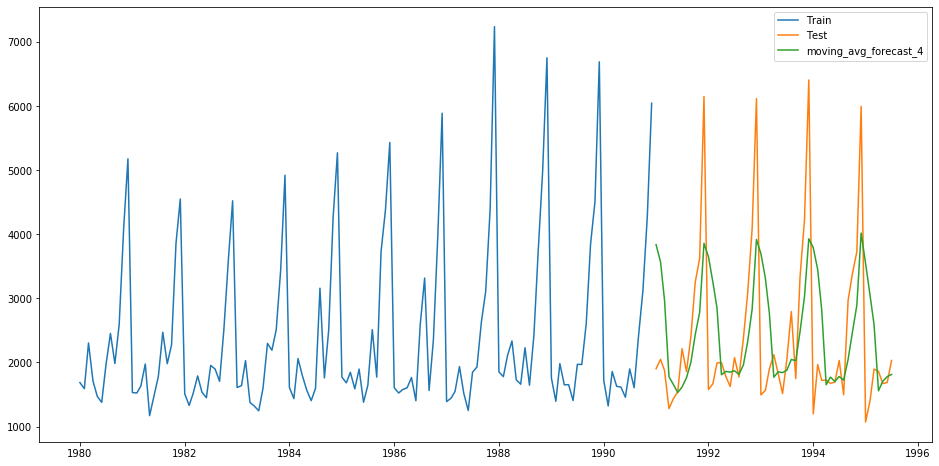

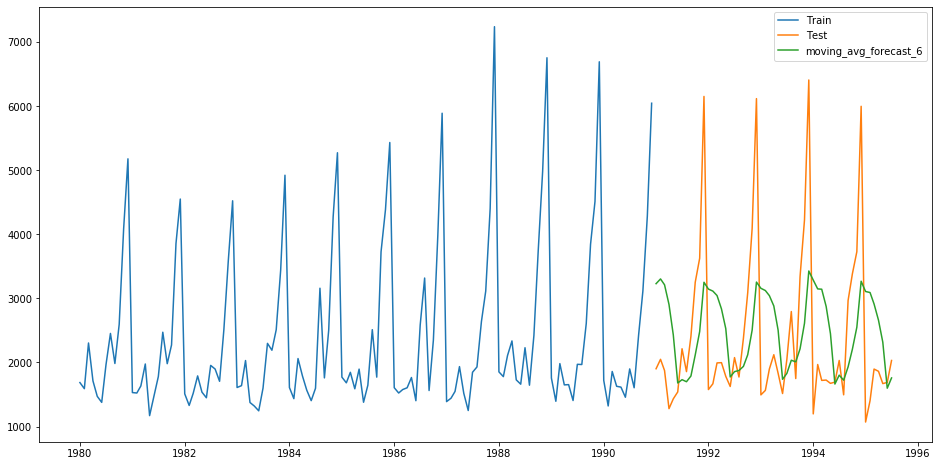

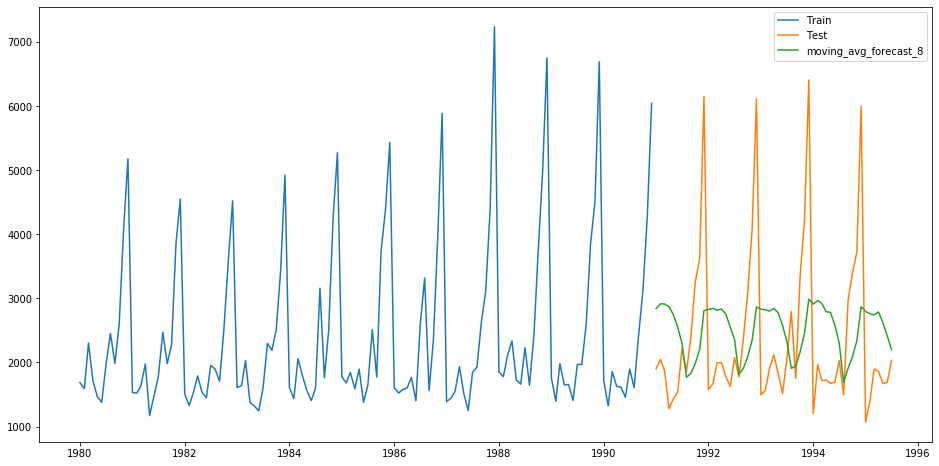

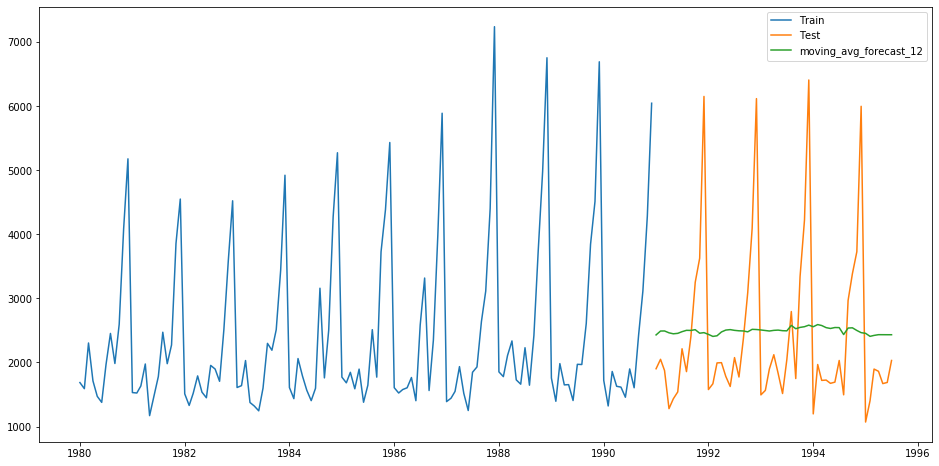

In [56]:
cols = ['moving_avg_forecast_4','moving_avg_forecast_6','moving_avg_forecast_8','moving_avg_forecast_12']

#Creating train and test set 
train=df1[df1.index.year <1991]
test=df1[df1.index.year >=1991]

y_hat_avg = test.copy()

for col_name in cols:
    
    plt.figure(figsize=(16,8))
    plt.plot(train['Sparkling'], label='Train')
    plt.plot(test['Sparkling'], label='Test')
    plt.plot(y_hat_avg[col_name], label = col_name)
    plt.legend(loc = 'best')

    rmse = sqrt(mean_squared_error(test.Sparkling, y_hat_avg[col_name]))
    rmse = round(rmse, 3)
    mape = MAPE(test.Sparkling, y_hat_avg[col_name])
    print("For Simple Average model, %s  RMSE is %3.3f MAPE is %3.2f" %(col_name, rmse, mape))
    
    #Defining the data frame with the model evaluation parameters

    tempResultsDf = pd.DataFrame({'Method':[col_name], 'rmse': [rmse], 'mape' : [mape]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])

In [57]:
print(resultsDf)

                     Method      rmse    mape
0          RegressionOnTime  1389.135   50.15
0  RegressionOnTimeSeasonal   420.867   13.29
0               Naive model  3864.279  152.87
0            Simple Average  1275.082   38.90
0     moving_avg_forecast_4  1156.590   35.96
0     moving_avg_forecast_6  1283.927   43.86
0     moving_avg_forecast_8  1342.568   46.46
0    moving_avg_forecast_12  1267.925   40.19


So Far RegressionOnTimeSeasonal  gives the lowest RMSE and MAPE

## Method 6: Simple Exponential Smoothing

In [58]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [60]:
# create class
SES = SimpleExpSmoothing(train['Sparkling'])

In [61]:
model_fit = SES.fit(optimized = True)

print('')
print('== Simple Exponential Smoothing ')
print('')

print('')
print('Smoothing Level', np.round(model_fit.params['smoothing_level'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


== Simple Exponential Smoothing 


Smoothing Level 0.0
Initial Level 2403.7856



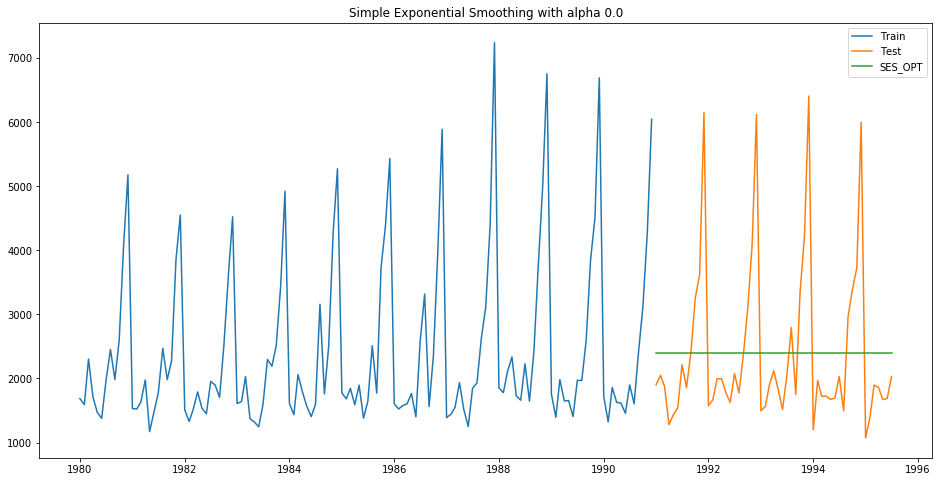

In [62]:
y_hat_avg['SES']     = model_fit.forecast(len(test['Sparkling']))

alpha_value          = np.round(model_fit.params['smoothing_level'], 4)


plt.figure(figsize=(16,8))
plt.plot(train.index, train['Sparkling'], label = 'Train')
plt.plot(test.index, test['Sparkling'],   label = 'Test')
plt.plot(test.index, y_hat_avg.SES,   label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

In [63]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Sparkling'], y_hat_avg.SES))
mape_opt             =  MAPE(test['Sparkling'], y_hat_avg.SES)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.00,  RMSE is 1275.0818 MAPE is 38.90


In [64]:
tempResultsDf = pd.DataFrame({'Method': 'SES', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                     Method         rmse    mape
0          RegressionOnTime  1389.135000   50.15
0  RegressionOnTimeSeasonal   420.867000   13.29
0               Naive model  3864.279000  152.87
0            Simple Average  1275.082000   38.90
0     moving_avg_forecast_4  1156.590000   35.96
0     moving_avg_forecast_6  1283.927000   43.86
0     moving_avg_forecast_8  1342.568000   46.46
0    moving_avg_forecast_12  1267.925000   40.19
0                       SES  1275.081823   38.90


## Method 7: Holt's Linear Trend Method (Double Exponential Smoothing)

In [65]:
import statsmodels.api as sm

y_hat_avg = test.copy()
model_fit = Holt(np.asarray(train['Sparkling'])).fit(optimized = True)
y_hat_avg['Holt_linear'] = model_fit.forecast(len(test))

In [66]:
print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)

print('Smoothing Level', alpha_value )
print('Smoothing Slope', beta_value)
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 0.6478
Smoothing Slope 0.0
Initial Level 1686.0838



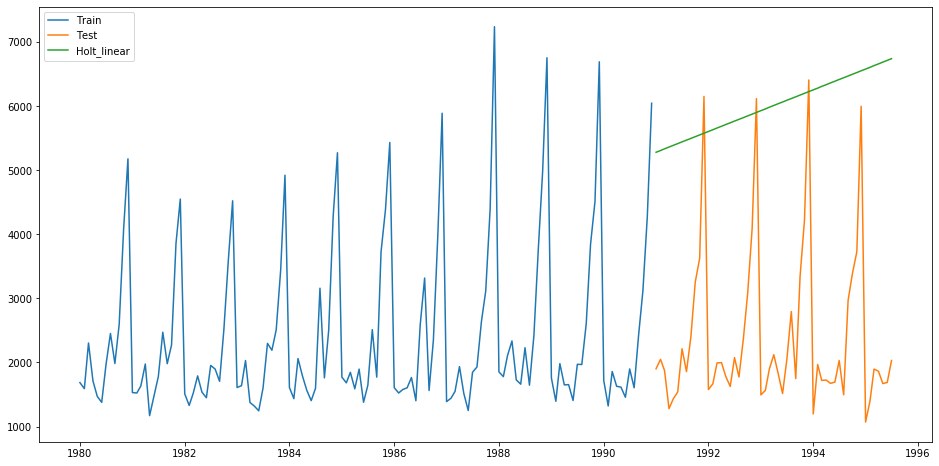

In [68]:
plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [69]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Sparkling'], y_hat_avg['Holt_linear']))
mape_opt             =  MAPE(test['Sparkling'], y_hat_avg['Holt_linear'])

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.65,  RMSE is 3850.9898 MAPE is 152.06


In [70]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_linear', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                     Method         rmse    mape
0          RegressionOnTime  1389.135000   50.15
0  RegressionOnTimeSeasonal   420.867000   13.29
0               Naive model  3864.279000  152.87
0            Simple Average  1275.082000   38.90
0     moving_avg_forecast_4  1156.590000   35.96
0     moving_avg_forecast_6  1283.927000   43.86
0     moving_avg_forecast_8  1342.568000   46.46
0    moving_avg_forecast_12  1267.925000   40.19
0                       SES  1275.081823   38.90
0               Holt_linear  3850.989796  152.06


## Method 8: Holt-Winters Method - Additive seasonality - Build this model and compare with the other models.

In [71]:
y_hat_avg = test.copy()
model_fit = ExponentialSmoothing(np.asarray(train['Sparkling']) ,seasonal_periods = 12 ,trend='add', seasonal='add').fit()

In [72]:
y_hat_avg['Holt_Winter'] = model_fit.forecast(len(test))

In [73]:
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.0862
Smoothing Slope:  0.0
Smoothing Seasonal:  0.4764
Initial Level:  1684.7567
Initial Slope:  0.0066
Initial Seasons:  [  39.1987  -37.2623  465.1161  205.8324 -140.6978 -156.9213  338.0668
  856.7698  403.4567  971.2481 2401.6944 3426.8878]



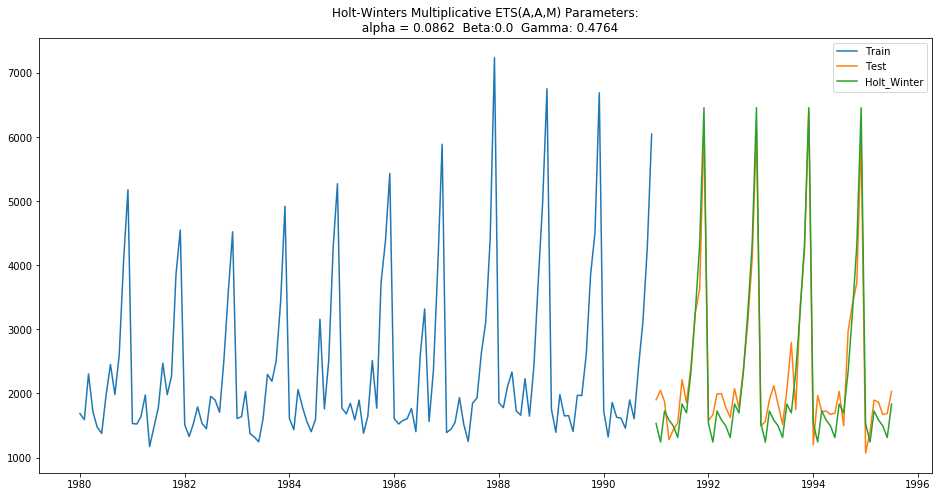

In [74]:
plt.figure(figsize=(16,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.title('Holt-Winters Multiplicative ETS(A,A,M) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [75]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Sparkling'], y_hat_avg['Holt_Winter']))
mape_opt             =  MAPE(test['Sparkling'], y_hat_avg['Holt_Winter'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.09, beta = 0.00, gamma = 0.48, RMSE is 362.7326 MAPE is 12.08


In [76]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                     Method         rmse    mape
0          RegressionOnTime  1389.135000   50.15
0  RegressionOnTimeSeasonal   420.867000   13.29
0               Naive model  3864.279000  152.87
0            Simple Average  1275.082000   38.90
0     moving_avg_forecast_4  1156.590000   35.96
0     moving_avg_forecast_6  1283.927000   43.86
0     moving_avg_forecast_8  1342.568000   46.46
0    moving_avg_forecast_12  1267.925000   40.19
0                       SES  1275.081823   38.90
0               Holt_linear  3850.989796  152.06
0               Holt_Winter   362.732615   12.08


## Method 9: Holt-Winters Method - Multiplicative Model

In [77]:
y_hat_avg = test.copy()
model_fit = ExponentialSmoothing(np.asarray(train['Sparkling']) ,seasonal_periods = 12 ,trend='add', seasonal='Multiplicative').fit()

In [78]:
y_hat_avg['Holt_Winter_M'] = model_fit.forecast(len(test))

In [79]:
print('')
print('== Holt-Winters Multiplicative ETS(A,A,M) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Multiplicative ETS(A,A,M) Parameters ==

Smoothing Level:  0.1542
Smoothing Slope:  0.0
Smoothing Seasonal:  0.3713
Initial Level:  1639.9993
Initial Slope:  4.8477
Initial Seasons:  [1.0084 0.969  1.2418 1.1321 0.9398 0.9381 1.2246 1.5443 1.2734 1.632
 2.4829 3.1186]



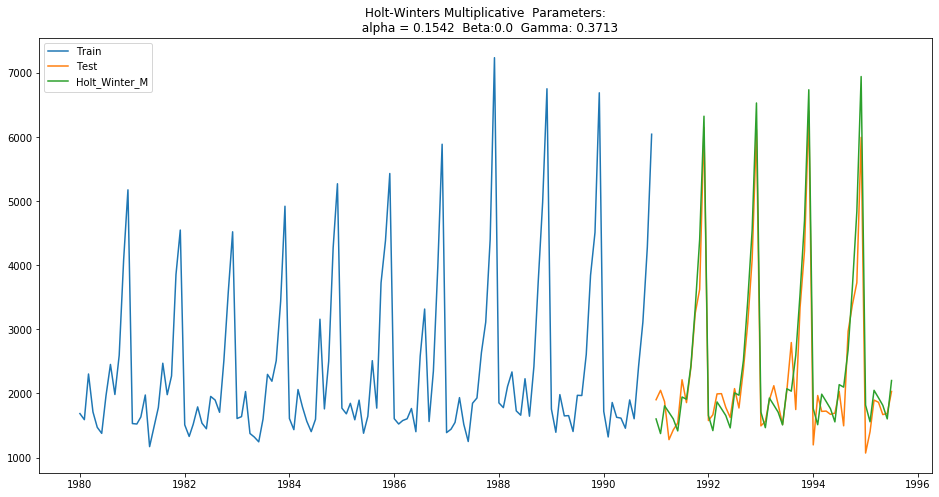

In [80]:
plt.figure(figsize=(16,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['Holt_Winter_M'], label='Holt_Winter_M')
plt.title('Holt-Winters Multiplicative  Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [81]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Sparkling'], y_hat_avg['Holt_Winter_M']))
mape_opt             =  MAPE(test['Sparkling'], y_hat_avg['Holt_Winter_M'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.15, beta = 0.00, gamma = 0.37, RMSE is 383.1576 MAPE is 11.91


In [82]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter M', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                     Method         rmse    mape
0          RegressionOnTime  1389.135000   50.15
0  RegressionOnTimeSeasonal   420.867000   13.29
0               Naive model  3864.279000  152.87
0            Simple Average  1275.082000   38.90
0     moving_avg_forecast_4  1156.590000   35.96
0     moving_avg_forecast_6  1283.927000   43.86
0     moving_avg_forecast_8  1342.568000   46.46
0    moving_avg_forecast_12  1267.925000   40.19
0                       SES  1275.081823   38.90
0               Holt_linear  3850.989796  152.06
0               Holt_Winter   362.732615   12.08
0             Holt_Winter M   383.157627   11.91


# Inference

As of now, we observe that Holt's Winter Multiplicative seems to be a good fit for the data.

##  Test Stationarity

In [83]:
train=df[df.index.year <1991]
test=df[df.index.year >=1991]

In [84]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

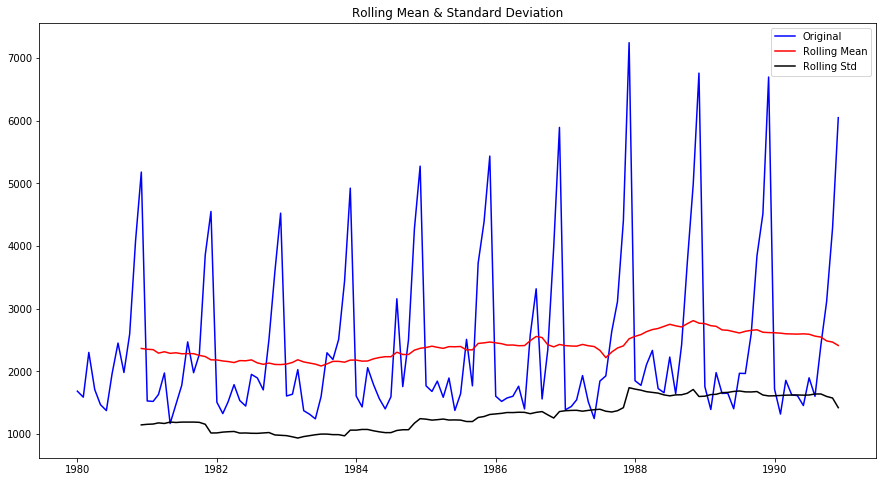

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [85]:
test_stationarity(train)

At 0.05 alpha, we can say that The time series is non stationary as the p-value >0.05 Hence, differentiation is required

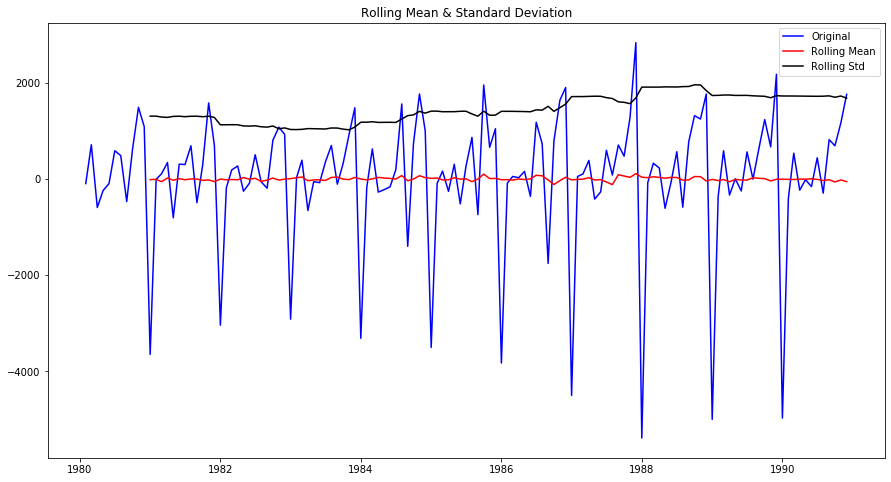

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [86]:
test_stationarity(train.diff().dropna())

## ARIMA

In [87]:
import itertools
p =  q = range(0, 3)
d=range(0, 2)

pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 1)(0, 0, 2, 12)
Model: (0, 0, 2)(0, 1, 0, 12)
Model: (0, 0, 2)(0, 1, 1, 12)


In [88]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
print(ARIMA_AIC)

Empty DataFrame
Columns: [param, AIC]
Index: []


In [89]:
train.tail(2)

,Sparkling
YearMonth,
1990-11-01,4286
1990-12-01,6047


In [90]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:2271.203212328525
ARIMA(0, 0, 1) - AIC:2245.2688513920953
ARIMA(0, 0, 2) - AIC:2245.3432152954183
ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906437115225
ARIMA(0, 1, 2) - AIC:2232.7830976841665
ARIMA(1, 0, 0) - AIC:2247.348274393555
ARIMA(1, 0, 1) - AIC:2245.9490941453487
ARIMA(1, 0, 2) - AIC:2246.0121936015285
ARIMA(1, 1, 0) - AIC:2268.5280605942976
ARIMA(1, 1, 1) - AIC:2235.013945351675
ARIMA(1, 1, 2) - AIC:2233.5976471190743
ARIMA(2, 0, 0) - AIC:2244.7999152004504
ARIMA(2, 0, 1) - AIC:2236.590818488305
ARIMA(2, 0, 2) - AIC:2200.904378120024
ARIMA(2, 1, 0) - AIC:2262.0356001096925
ARIMA(2, 1, 1) - AIC:2232.3604898897147
ARIMA(2, 1, 2) - AIC:2210.6176473763135


In [91]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
14,"(2, 0, 2)",2200.904378
17,"(2, 1, 2)",2210.617647
16,"(2, 1, 1)",2232.360490
5,"(0, 1, 2)",2232.783098
11,"(1, 1, 2)",2233.597647
10,"(1, 1, 1)",2235.013945
13,"(2, 0, 1)",2236.590818
12,"(2, 0, 0)",2244.799915
1,"(0, 0, 1)",2245.268851
2,"(0, 0, 2)",2245.343215


In [92]:
## ARIMA(2,0,2) has the lowest AIC
mod = ARIMA(train, order=(2,0,2))

results_Arima = mod.fit()

print(results_Arima.summary())

                              ARMA Model Results                              
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                     ARMA(2, 2)   Log Likelihood               -1094.452
Method:                       css-mle   S.D. of innovations            932.835
Date:                Sun, 26 Jul 2020   AIC                           2200.904
Time:                        17:48:17   BIC                           2218.201
Sample:                    01-01-1980   HQIC                          2207.933
                         - 12-01-1990                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2399.2697     53.727     44.657      0.000    2293.966    2504.573
ar.L1.Sparkling     1.7209      0.014    124.024      0.000       1.694       1.748
ar.L2.Sparkling    -0.9849      

In [93]:
test.shape

(55, 1)

In [94]:
test= test.astype(float)
final_hat_avg =test.copy()
pred_Arima = results_Arima.forecast(steps=55)

In [97]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test,pred_Arima[0],squared=False)
print(rmse)

1004.8670938821133


In [96]:
resultsDf1 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,0,2)'])

resultsDf1

,RMSE
"ARIMA(2,0,2)",1004.867094


In [98]:
tempResultsDf = pd.DataFrame({'Method': 'ARIMA(2,0,2)', 'rmse': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                     Method         rmse    mape
0          RegressionOnTime  1389.135000   50.15
0  RegressionOnTimeSeasonal   420.867000   13.29
0               Naive model  3864.279000  152.87
0            Simple Average  1275.082000   38.90
0     moving_avg_forecast_4  1156.590000   35.96
0     moving_avg_forecast_6  1283.927000   43.86
0     moving_avg_forecast_8  1342.568000   46.46
0    moving_avg_forecast_12  1267.925000   40.19
0                       SES  1275.081823   38.90
0               Holt_linear  3850.989796  152.06
0               Holt_Winter   362.732615   12.08
0             Holt_Winter M   383.157627   11.91
0              ARIMA(2,0,2)  1004.867094     NaN


## SARIMA

In [99]:
### As the dataset has seasonality.. Let's build the model with SARIMA

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
print(SARIMA_AIC)

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []


In [100]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2447.5387828489993
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:2094.785599211086
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:1815.8304642022845
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1786.4850411919433
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1596.2586002542691
SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:1428.1357423138384
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1802.3841958898233
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1765.9902957951265
SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:1602.6508528654624
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1615.0445907515473
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1598.2582087357744
SARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:1429.736216741068
SARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:1616.3804986882144
SARIMA(0, 0, 0)x(2, 0, 1, 12) - AIC:1612.0535874416057
SARIMA(0, 0, 0)x(2, 0, 2, 12) - AIC:1596.0861886481762
SARIMA(0, 0, 0)x(2, 1, 0, 12) - AIC:1441.2182003596358
SARIMA(0, 0, 0)x(2, 1, 1, 12) - AIC:1443.0752316170665
SARIMA(0, 0, 0)x(2, 1, 2, 12) - AIC:1429.1328452764574
SARIMA(0, 0,

SARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC:1782.9027535817418
SARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:1738.522116904209
SARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:1569.100479013813
SARIMA(1, 0, 2)x(1, 1, 0, 12) - AIC:1597.9697722808032
SARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:1569.5436823208631
SARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:1399.001906978034
SARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:1602.4786883409743
SARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:1603.5662349744887
SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:1609.0853119142505
SARIMA(1, 0, 2)x(2, 1, 0, 12) - AIC:1425.2654041596015
SARIMA(1, 0, 2)x(2, 1, 1, 12) - AIC:1427.139711586788
SARIMA(1, 0, 2)x(2, 1, 2, 12) - AIC:1400.0862083072984
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.393833990475
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476356088
SARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1810.9513015567377
SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:1613.740703340952
SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:1441.4259994233707
SARIMA(1, 1, 0)x

SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.123506089681
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595848658199
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1573.4865281683738
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:1400.9854069823386
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:1401.992473545547
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:1403.818345605388
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.868114915305
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372640176598
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523433051999
SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1742.2930718563246
SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:1556.946732412683
SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:1384.317618064499
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1759.8453628603875
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1726.6379805430956
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.4272124697718
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:1573.1168644411769
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:1558.1200892494853
SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:1386.0972420197802
SARIMA(2, 1, 2)x

In [101]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
203,"(1, 1, 2)","(0, 1, 2, 12)",1382.347780
95,"(0, 1, 2)","(0, 1, 2, 12)",1382.484254
209,"(1, 1, 2)","(1, 1, 2, 12)",1384.137874
311,"(2, 1, 2)","(0, 1, 2, 12)",1384.317618
101,"(0, 1, 2)","(1, 1, 2, 12)",1384.398867


In [102]:
## SARIMA
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1,1,2),
                                seasonal_order=(0, 1, 2, 12),
                    
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -881.606
Date:                            Sun, 26 Jul 2020   AIC                           1775.212
Time:                                    18:08:47   BIC                           1791.886
Sample:                                01-01-1980   HQIC                          1781.983
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6295      0.295     -2.130      0.033      -1.209      -0.050
ma.L1         -0.1224      0.263   

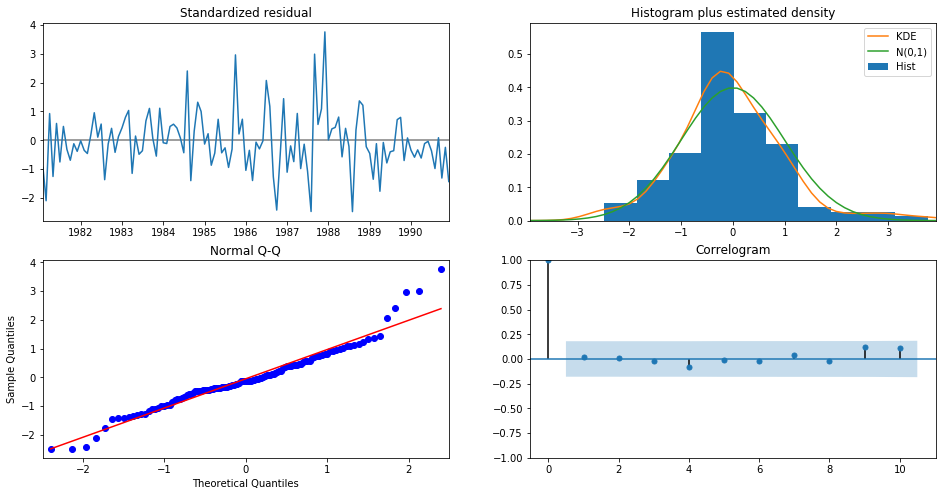

In [103]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

In [104]:
test= test.astype(float)
final_hat_avg =test.copy()
pred_Sarima = results_SARIMA.get_forecast(steps=55)
pred_Sarima.predicted_mean

1991-01-01    1459.125548
1991-02-01    1321.236922
1991-03-01    1694.352753
1991-04-01    1601.165782
1991-05-01    1466.029731
1991-06-01    1310.630380
1991-07-01    1800.532973
1991-08-01    1628.638616
1991-09-01    2282.424799
1991-10-01    3176.458795
1991-11-01    4255.844055
1991-12-01    6157.712235
1992-01-01    1420.464732
1992-02-01    1209.440831
1992-03-01    1628.735538
1992-04-01    1507.873165
1992-05-01    1388.436819
1992-06-01    1219.542573
1992-07-01    1720.379163
1992-08-01    1549.555350
1992-09-01    2198.586712
1992-10-01    3101.097549
1992-11-01    4176.441074
1992-12-01    6084.993084
1993-01-01    1340.475334
1993-02-01    1125.145417
1993-03-01    1547.150731
1993-04-01    1424.582051
1993-05-01    1306.219812
1993-06-01    1136.649423
1993-07-01    1637.911640
1993-08-01    1466.819898
1993-09-01    2116.019920
1993-10-01    3018.424586
1993-11-01    4093.834945
1993-12-01    6002.344884
1994-01-01    1257.853617
1994-02-01    1042.507029
1994-03-01  

In [105]:
pred_Sarima.summary_frame()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,1459.125548,385.102698,704.338130,2213.912965
1991-02-01,1321.236922,396.779338,543.563709,2098.910135
1991-03-01,1694.352753,396.809832,916.619773,2472.085734
1991-04-01,1601.165782,401.619751,814.005534,2388.326030
1991-05-01,1466.029731,402.464198,677.214399,2254.845064
1991-06-01,1310.630380,405.395721,516.069367,2105.191393
1991-07-01,1800.532973,406.855477,1003.110892,2597.955054
1991-08-01,1628.638616,409.162870,826.694128,2430.583105
1991-09-01,2282.424799,410.900886,1477.073862,3087.775736
1991-10-01,3176.458795,412.971495,2367.049539,3985.868052


In [106]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test ,pred_Sarima.predicted_mean))
print(rmse)

453.62129428741446


In [107]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(0,1,2,12)'])

resultsDf1 = pd.concat([resultsDf1, temp_resultsDf])
resultsDf1

,RMSE
"ARIMA(2,0,2)",1004.867094
"SARIMA(1,1,2)(0,1,2,12)",453.621294


In [108]:
resultsDf

,Method,rmse,mape
0,RegressionOnTime,1389.135000,50.15
0,RegressionOnTimeSeasonal,420.867000,13.29
0,Naive model,3864.279000,152.87
0,Simple Average,1275.082000,38.90
0,moving_avg_forecast_4,1156.590000,35.96
0,moving_avg_forecast_6,1283.927000,43.86
0,moving_avg_forecast_8,1342.568000,46.46
0,moving_avg_forecast_12,1267.925000,40.19
0,SES,1275.081823,38.90
0,Holt_linear,3850.989796,152.06


In [109]:
tempResultsDf = pd.DataFrame({'Method': 'SARIMA(0,1,2)(2,1,2,12)', 'rmse': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                     Method         rmse    mape
0          RegressionOnTime  1389.135000   50.15
0  RegressionOnTimeSeasonal   420.867000   13.29
0               Naive model  3864.279000  152.87
0            Simple Average  1275.082000   38.90
0     moving_avg_forecast_4  1156.590000   35.96
0     moving_avg_forecast_6  1283.927000   43.86
0     moving_avg_forecast_8  1342.568000   46.46
0    moving_avg_forecast_12  1267.925000   40.19
0                       SES  1275.081823   38.90
0               Holt_linear  3850.989796  152.06
0               Holt_Winter   362.732615   12.08
0             Holt_Winter M   383.157627   11.91
0              ARIMA(2,0,2)  1004.867094     NaN
0   SARIMA(0,1,2)(2,1,2,12)   453.621294     NaN


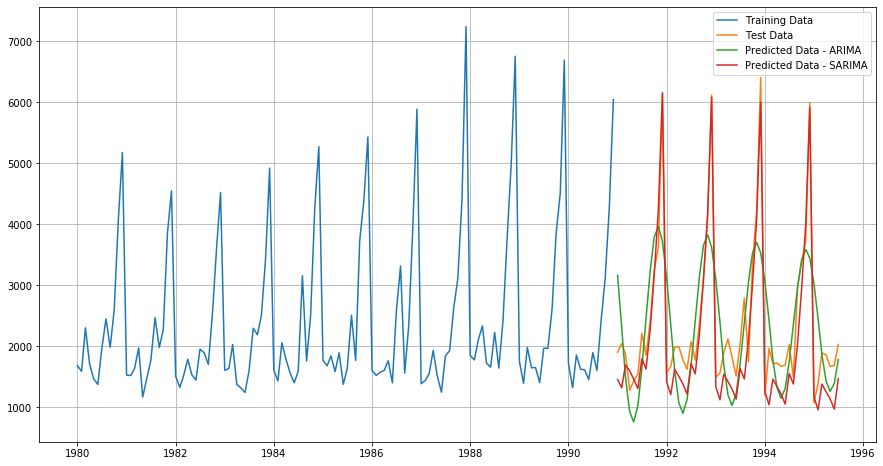

In [110]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_Arima[0],label='Predicted Data - ARIMA')
plt.plot(test.index,pred_Sarima.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

## Building the iterations of the models based on the ACF and PACF plots.

### SARIMA Model

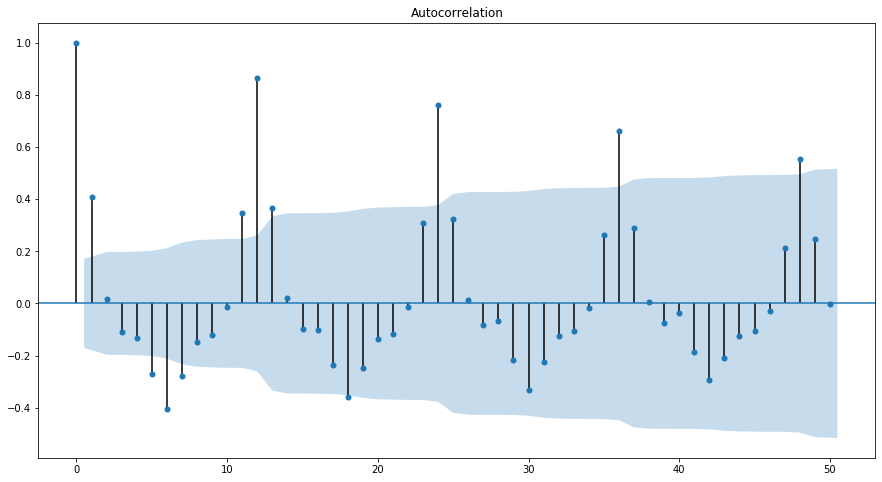

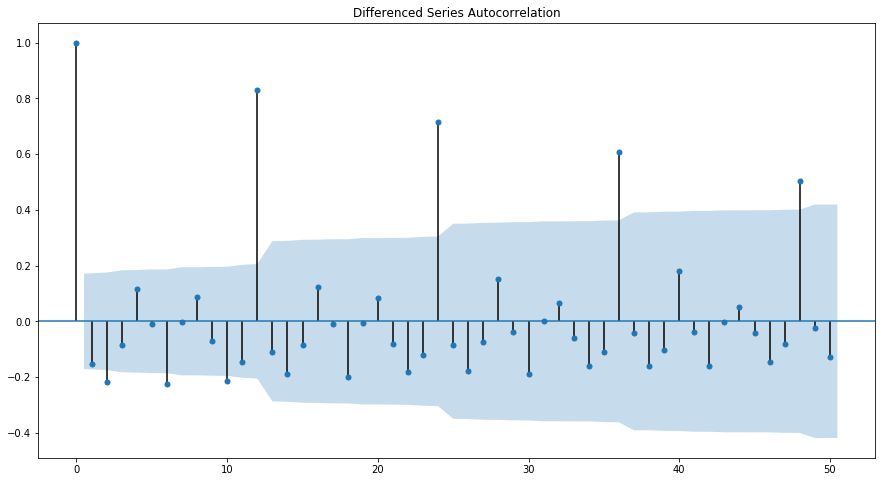

In [111]:
rcParams['figure.figsize'] = 15,8
plot_acf(train['Sparkling'],lags=50)
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Series Autocorrelation')
plt.show()

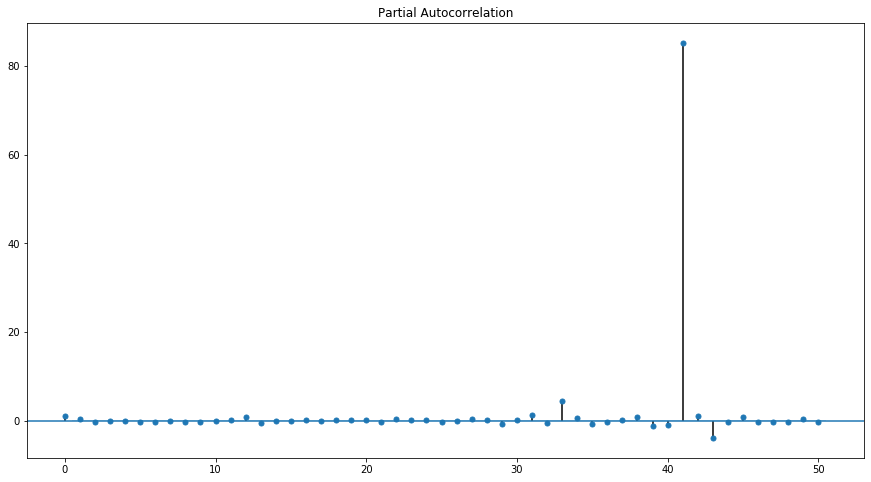

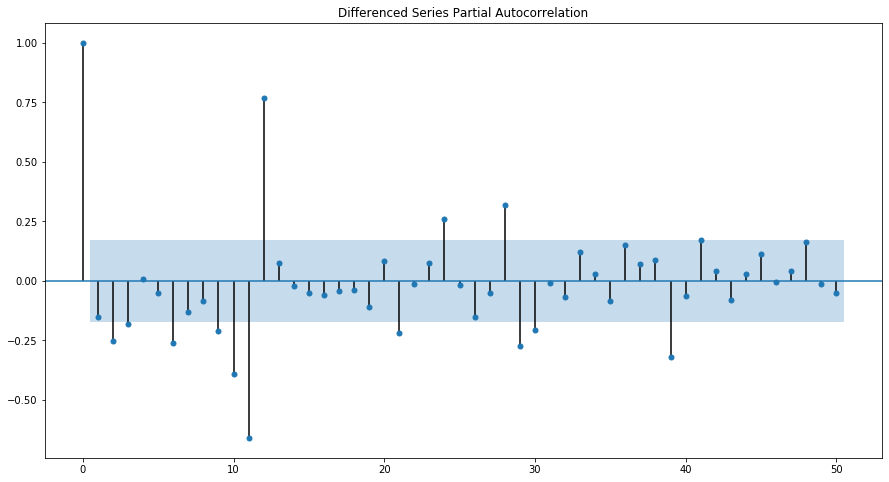

In [112]:
plot_pacf(train['Sparkling'],lags=50)
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Series Partial Autocorrelation')
plt.show()

In [126]:
mod = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1,1,1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit(maxiter=100000)
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -998.890
Date:                             Sun, 26 Jul 2020   AIC                           2005.780
Time:                                     18:20:28   BIC                           2017.281
Sample:                                 01-01-1980   HQIC                          2010.453
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2536      0.066      3.824      0.000       0.124       0.384
ma.L1         -1.0000      

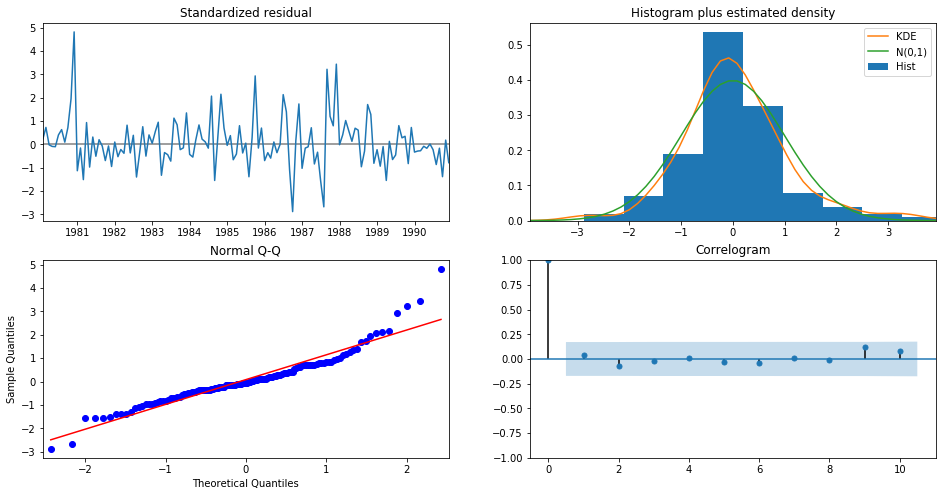

In [127]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Predict on the Test Set using this model and evaluate the model.

In [128]:
pred = results.get_forecast(steps=len(test))
pred.predicted_mean

1991-01-01    1673.490345
1991-02-01    1368.455136
1991-03-01    1887.054613
1991-04-01    1675.987812
1991-05-01    1664.960038
1991-06-01    1517.923953
1991-07-01    1930.098567
1991-08-01    1656.001776
1991-09-01    2419.611327
1991-10-01    3064.807443
1991-11-01    4155.672059
1991-12-01    5797.562796
1992-01-01    1719.865672
1992-02-01    1435.462234
1992-03-01    1918.985030
1992-04-01    1722.194223
1992-05-01    1711.912338
1992-06-01    1574.821381
1992-07-01    1959.117606
1992-08-01    1703.559990
1992-09-01    2415.521030
1992-10-01    3017.077804
1992-11-01    4034.159250
1992-12-01    5564.996883
1993-01-01    1763.104302
1993-02-01    1497.937153
1993-03-01    1948.755758
1993-04-01    1765.275356
1993-05-01    1755.688911
1993-06-01    1627.870420
1993-07-01    1986.173874
1993-08-01    1747.901493
1993-09-01    2411.707390
1993-10-01    2972.576470
1993-11-01    3920.865244
1993-12-01    5348.161108
1994-01-01    1803.418387
1994-02-01    1556.186436
1994-03-01  

In [129]:
rmse = mean_squared_error(test['Sparkling'],pred.predicted_mean,squared=False)
print(rmse)

370.54084144211396


In [130]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1, 1, 1)(1, 0, 0, 12)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,RMSE
"ARIMA(2,0,2)",1004.867094
"SARIMA(1,1,2)(0,1,2,12)",453.621294
"SARIMA(1, 1, 1)(1, 0, 0, 12)",370.540841


In [131]:
tempResultsDf = pd.DataFrame({'Method': 'SARIMA(1, 1, 1)(1, 0, 0, 12)', 'rmse': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                         Method         rmse    mape
0              RegressionOnTime  1389.135000   50.15
0      RegressionOnTimeSeasonal   420.867000   13.29
0                   Naive model  3864.279000  152.87
0                Simple Average  1275.082000   38.90
0         moving_avg_forecast_4  1156.590000   35.96
0         moving_avg_forecast_6  1283.927000   43.86
0         moving_avg_forecast_8  1342.568000   46.46
0        moving_avg_forecast_12  1267.925000   40.19
0                           SES  1275.081823   38.90
0                   Holt_linear  3850.989796  152.06
0                   Holt_Winter   362.732615   12.08
0                 Holt_Winter M   383.157627   11.91
0                  ARIMA(2,0,2)  1004.867094     NaN
0       SARIMA(0,1,2)(2,1,2,12)   453.621294     NaN
0  SARIMA(1, 1, 1)(1, 0, 0, 12)   370.540841     NaN


### Building Forecast for 12 months

In [132]:
## To get the real forecast for 7 days, we will rerun the model on the complete dataset

mod = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood               -1460.571
Date:                             Sun, 26 Jul 2020   AIC                           2929.142
Time:                                     18:25:14   BIC                           2942.045
Sample:                                 01-01-1980   HQIC                          2934.371
                                      - 07-01-1995                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9907      0.033    -29.586      0.000      -1.056      -0.925
ma.L1          1.0088      

In [133]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1995-07-01'), dynamic=True, full_results=True)

In [134]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [135]:
pred95 = results.get_forecast(steps=12, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [136]:
pred_ci_95

,lower Sparkling,upper Sparkling
1995-08-01,426.571640,2648.036136
1995-09-01,1318.696645,4461.234231
1995-10-01,1345.746642,5194.187929
1995-11-01,1365.475059,5809.694386
1995-12-01,3182.096138,8150.606543
1996-01-01,-1571.569963,3871.464928
1996-02-01,-1487.349610,4391.569546
1996-03-01,-1234.465193,5050.610200
1996-04-01,-1459.233395,5206.896272
1996-05-01,-1813.511937,5213.416053


In [137]:
forecast_fullmodel_sarimax = pred95.predicted_mean

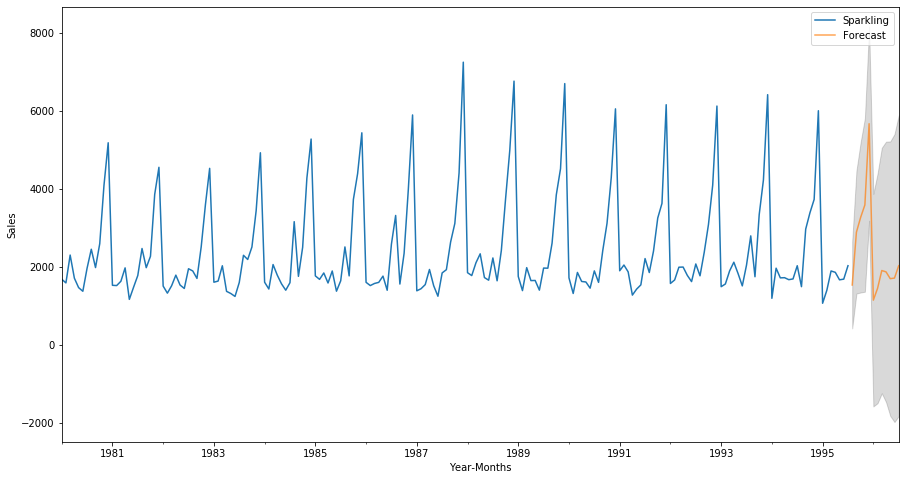

In [138]:
# plot the forecast along with the confidence band

axis = df.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_sarimax.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_sarimax.index, pred_ci_95['lower Sparkling'], pred_ci_95['upper Sparkling'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()